# Practical Lab 1 - Univariate Linear Regression on the California Housing Prices Dataset

#### Step 1 - Framing the problem - describing the goal of this report

The goal of this lab is to run a linear regression between the median and house value which is the dependent variable with the independent variables like the median income, populations and number of households. The main focus is to identify which feature offers the best predictive power for median house value using linear regression evaluation metrics. 

#### Step 2 -  Getting the Data from the hyperlink, convert it into the .csv file , load it into pandas 

#### Adding Imports

In [223]:
import kagglehub
import os
import shutil
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#### Download the datasource from kaggle
- the dataset_download method returns the path where the dataset has been downloaded

#### Step 2: Move the .csv file to data directory

In [224]:
def move_csvs_to_data(src_dir, target_dir='data'):
    # will create the data directory only if doesn't exists
    os.makedirs(target_dir, exist_ok=True)

    for root,_, files in os.walk(src_dir):
        for file in files:
            if file.endswith('.csv'):
                source = os.path.join(root, file)
                destination = os.path.join(target_dir, file)
                # copies the file from source to destination
                shutil.copy(source, destination)

In [225]:
dataset_path = kagglehub.dataset_download("camnugent/california-housing-prices")

In [226]:
move_csvs_to_data(dataset_path)

#### Step2. Load the dataset using the pandas

In [227]:
df = pd.read_csv("./data/housing.csv")

In [228]:
print(df.head())

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  


#### Step 3 - 1 - Explore statistics

In [229]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


##### Step 3 - 2 Create three Seaborn scatter plots of median house value vs. median income, population, and number of households. There should be one scatter plot for each independent variable. Add a title to each graph (using Seaborn). Provide a textual interpretation of the graphs and insights specific to the linear regression you are going to conduct next.

In [230]:
# set the seaborn style
sns.set(style="whitegrid")

##### Scatter plot for median_house_value vs median_income

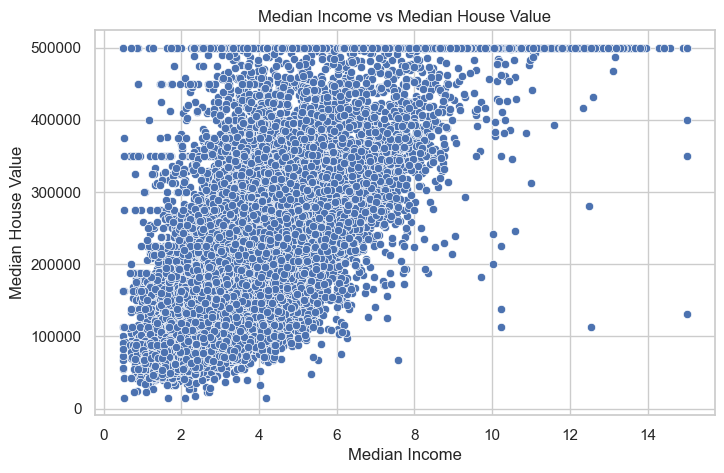

In [231]:
# Set Seaborn style
sns.set(style="whitegrid")

# 1. Median Income vs Median House Value
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x="median_income", y="median_house_value")
plt.title("Median Income vs Median House Value")
plt.xlabel("Median Income")
plt.ylabel("Median House Value")
plt.show()


##### Textual interpretation of Median Income vs Median House Value 
Insight: From the above graph, we can see that there is a strong positive correlation which means as income increases, house value increases.

##### Scatter plot for median_house_value vs population

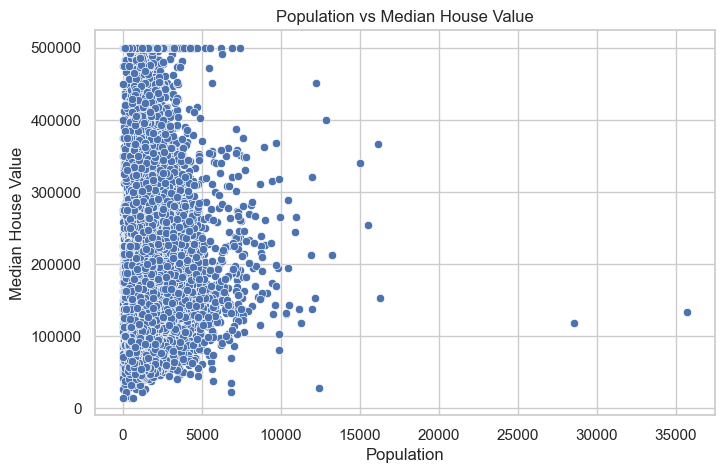

In [232]:
# 2. Population vs Median House Value
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x="population", y="median_house_value")
plt.title("Population vs Median House Value")
plt.xlabel("Population")
plt.ylabel("Median House Value")
plt.show()

##### Textual interpretation of Population vs Median House Value 
From the above graph, there is a cloud of points but there is no clear trend although high-density areas sometimes show higher prices.

##### Scatter plot for median_house_value vs households

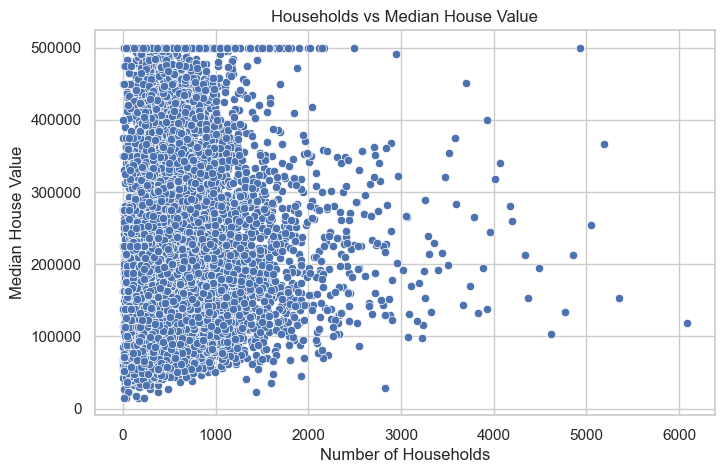

In [233]:
# 3. Households vs Median House Value
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x="households", y="median_house_value")
plt.title("Households vs Median House Value")
plt.xlabel("Number of Households")
plt.ylabel("Median House Value")
plt.show()

##### Textual interpretation of Number of Households vs Median House Value 
From the above graph, more households here are generally aligned with higher house values but not strongly.

#### Step 3 - 3 describe the 4 variables used in this lab. Observations such as their meaning, range, and additional characteristics

- Median Income
    - Represents the median income of households in a given block group
    - Ranges from 0 to 15
    - Higher income areas have more expensive houses.

- Median House Value
    - Median price of houses in the area.
    - From ~$15,000 to $500,001.
    - This is mostly the depenedent variable.

- Population
    - Total number of residents in a block group.
    - Varies widely between dozens to 35,000.
    - No strong linear relationship with house value and the clusters show varying housing values for similar population sizes.

- Households
    - Number of households in the area.
    - Ranges from 1 to over 6,000.
    - Shows a weak positive trend with house value and more households may imply urban density but the relationship is not strong.